In [3]:
import itertools
import math
import matplotlib.pyplot as plt
import multiprocessing as mp
import time
import os

In [4]:
def stp_brute_force(cities, start_city_idx=None):
    if start_city_idx is not None:
        start_city = cities[start_city_idx]
        cities = cities[:start_city_idx] + cities[start_city_idx+1:]
        permutations = ((start_city,) + perm for perm in itertools.permutations(cities))
    else:
        permutations = ((cities[0],) + perm for perm in itertools.permutations(cities[1:]))

    # Initialize variables
    shortest_path = None
    shortest_distance = math.inf

    # Calculate the distance of each path
    for permutation in permutations:
        distance = 0
        for i in range(len(permutation) - 1):
            city1 = permutation[i]
            city2 = permutation[i + 1]
            distance += math.sqrt((city2[0] - city1[0])**2 + (city2[1] - city1[1])**2)

        # Update the shortest path and distance if the current path is shorter
        if distance < shortest_distance:
            shortest_path = permutation
            shortest_distance = distance

    return shortest_path, shortest_distance

In [5]:
def plot_solution(cities, shortest_path, shortest_distance, start_index=None):
    # Plot the cities and the shortest path
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]
    
    # Plot the cities as blue dots
    plt.plot(x, y, 'bo')

    for i in range(len(shortest_path) - 1):
        city1 = shortest_path[i]
        city2 = shortest_path[i + 1]
        plt.plot([city1[0], city2[0]], [city1[1], city2[1]], 'r')

    # Plot the red line segments for the shortest path
    plt.plot([shortest_path[-1][0], shortest_path[0][0]], [shortest_path[-1][1], shortest_path[0][1]], 'r')

    # Plot start city if index is given
    if start_index is not None:
        start_city = cities[start_index]
        plt.plot(start_city[0], start_city[1], 'go', markersize=10)

    plt.title(f'Shortest Path: {shortest_distance:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [8]:
cities=[(1593.0, 569.0), (907.0, 1672.0), (1448.0, 694.0), (2593.0, 2501.0), (757.0, 1531.0), (895.0, 655.0),
 (2101.0, 1064.0), (8388.0, 718.0), (6607.0, 839.0),(480.0, 1202.0),(724.0, 957.0), (1840.0, 1656.0)]

In [9]:
start_time = time.time_ns() // 1000 
shortest_path, shortest_distance = stp_brute_force(cities,3)
end_time = time.time_ns() // 1000  
elapsed_time = end_time - start_time
print("Elapsed time: {} microseconds".format(elapsed_time))

Elapsed time: 505364386 microseconds


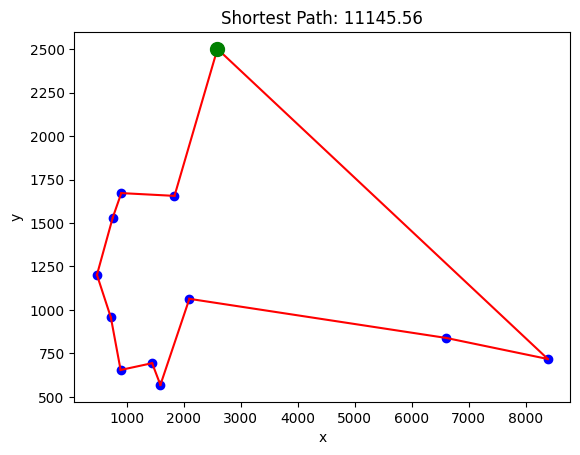

In [10]:
plot_solution(cities, shortest_path, shortest_distance, start_index=3)